<a href="https://colab.research.google.com/github/yannick42/notebooks/blob/master/_notebooks/2022-04-22-Superstore_Sales_Dataset_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Superstore Sales Dataset (WIP)"
> "Quick EDA/Plots"

- toc: true
- badges: false
- comments: false
- author: Yannick
- categories: [EDA]

> Note: This is a test

> Warning: This is a Work in Progress

Superstore Sales Dataset : https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting


TODO :
- find correlations...
- try to use an application of PCA (?)

# Setup

In [2]:
%%capture
!pip install kaggle --upgrade

In [3]:
%%capture
import os
from getpass import getpass
kaggle_username = input("Kaggle USERNAME : ")
os.environ['KAGGLE_USERNAME'] = kaggle_username
kaggle_key = getpass("Kaggle KEY for "+os.environ.get('KAGGLE_USERNAME')+": ")
os.environ["KAGGLE_KEY"] = kaggle_key

Kaggle USERNAME : yannick42
Kaggle KEY for yannick42: ··········


In [4]:
!kaggle datasets download -d rohitsahoo/sales-forecasting
!unzip -n sales-forecasting.zip
!ls -la

  0% 0.00/480k [00:00<?, ?B/s]
100% 480k/480k [00:00<00:00, 94.9MB/s]
Archive:  sales-forecasting.zip
  inflating: train.csv               
total 2580
drwxr-xr-x 1 root root    4096 Apr 23 12:31 .
drwxr-xr-x 1 root root    4096 Apr 23 12:29 ..
drwxr-xr-x 4 root root    4096 Apr 19 14:22 .config
-rw-r--r-- 1 root root  491942 Apr 23 12:31 sales-forecasting.zip
drwxr-xr-x 1 root root    4096 Apr 19 14:23 sample_data
-rw-r--r-- 1 root root 2129689 Sep 11  2020 train.csv


# Load & Display some data 

In [2]:
# => sets the backend of matplotlib to the 'inline' backend (still necessary ?)
%matplotlib inline

import pandas as pd
import numpy as np
np.random.seed(42)

from matplotlib import pyplot as plt
# for visualizations (scatter plot, boxplot, ...)
import seaborn as sns

"""
18 columns :
- 1 numeric
  - sales (in $)
- 14 strings
  - order date
  - ship date
  - category
  - sub-category
  - ...
"""

df = pd.read_csv('train.csv', parse_dates=True, infer_datetime_format=True)

In [3]:
"""
- TODO : Postal Code could be filled by using the city name and using 
  what other lines with the same city name uses ... ?
  (-> only 11 rows have this problem on 9800 sales)
"""

df['Sales'].describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

In [ ]:
df.head() # first 5 rows

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Various charts

## Boxplot

The **boxplot** shows the sales (in \$) distribution is skewed. There is a lot of "outliers" (higher amount orders), but the median is \$54

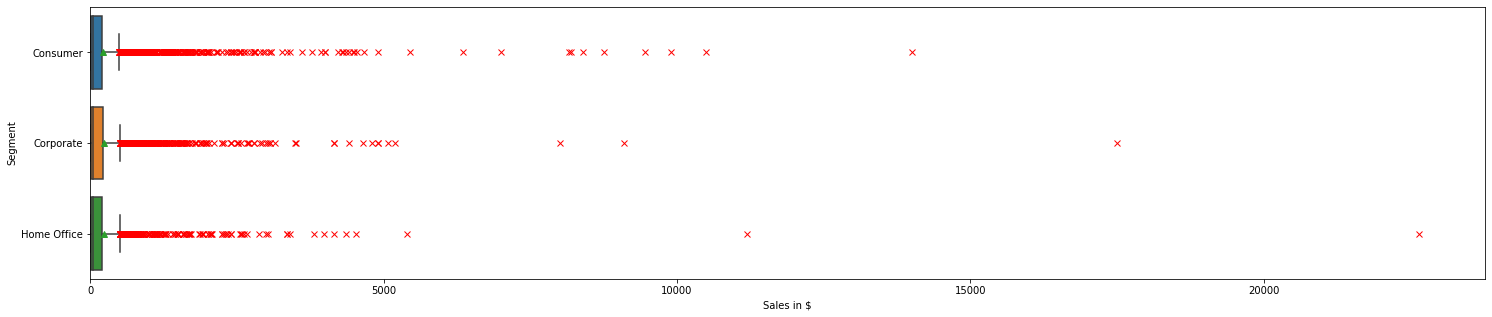

In [6]:
#collapse-hide

plt.figure(figsize=(25,5))

ax = sns.boxplot(
  y='Segment',
  x='Sales',
  orient="h", # horizontal
  data=df.query('Segment == "Consumer" | Segment == "Corporate" | Segment == "Home Office"'),
  showmeans=True,
  showfliers=True, # (default=None) False to remove outliers
  flierprops=dict(
    marker='x',
    markerfacecolor=None,
    markersize=6,
    markeredgecolor='red'
  )
)

ax.set(xlabel='Sales in $', xlim=(0, None))

plt.show()

## Skewness & Kurtosis

In [10]:
print("Sales :")
# Skewness
print("skewness : ", df['Sales'].skew()) # 12.98 : (highly) positive skew (tail longer toward the right)

# Kurtosis
print("kurtosis : ", df['Sales'].kurt()) # 304.44 : leptokurtic (because, > 3), pointy
# => indicator that data has heavy outliers

df["Duration"] = (pd.to_datetime(df["Ship Date"], format='%d/%m/%Y') - pd.to_datetime(df["Order Date"], format='%d/%m/%Y')).astype('timedelta64[h]').astype(np.int32) / 24
print("\nShipping duration :")
# Skewness
print("skewness : ", df['Duration'].skew()) # -0.42 : fairly symmetrical (if between -0.5 and 0.5, 0=symmetrical)

# Kurtosis
print("kurtosis : ", df['Duration'].kurt()) # -0.28 : platykurtic (<3), negative => less pointy (slightly flatter) than the normal distribution

Sales :
skewness :  12.983482865034619
kurtosis :  304.4450883210413

Shipping duration :
skewness :  -0.4273575345243775
kurtosis :  -0.280888535513812


## Montly Sales

The number of sales seems to be increasing each year

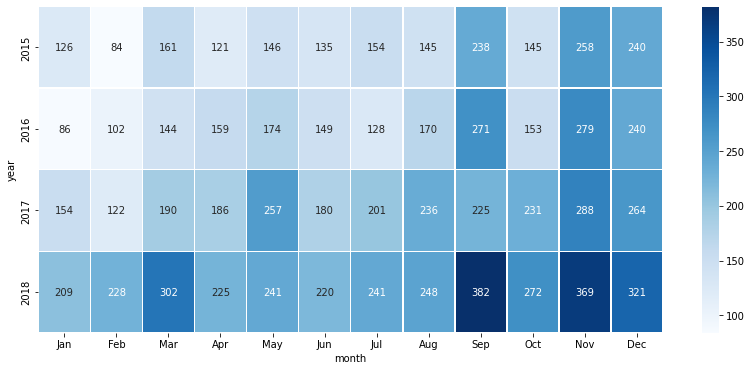

In [ ]:
#collapse-hide

plt.figure(figsize=(14,6))

# transform "string" to date "number"
df['month'] = pd.to_datetime(df['Order Date']).dt.month
df['year'] = pd.to_datetime(df['Order Date']).dt.to_period('Y')

#print(df.month.head())
#print(df.year.head())

df_grouped = df.groupby(['month', 'year']).size().to_frame('size') # to name the size column... 'cause size() returns a Series object
total_sales = df_grouped['size'].sum()
#print(df_grouped)
piv = pd.pivot_table(df_grouped, values="size",index=["year"], columns=["month"], fill_value=0)
sns.heatmap(piv, xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], annot=True, fmt="d", linewidths=0.5, cmap="Blues");

September, and the end of the year seems to be the most profitable months of the year

Total value over 4 years : 2.262 M$
Mean sale value : 231$


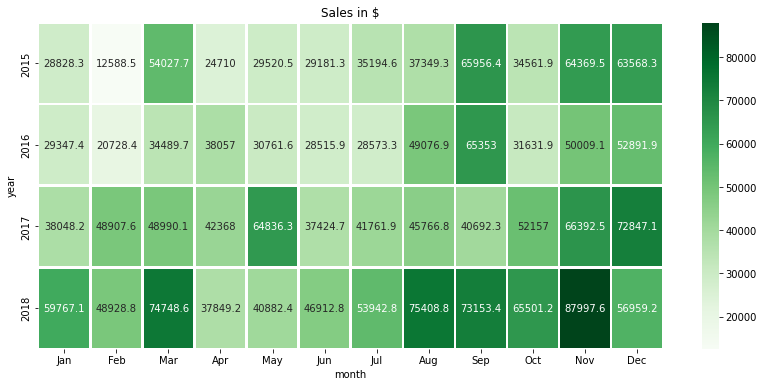

In [ ]:
#collapse-hide

plt.figure(figsize=(14,6))

# generated in the cell above
df_grouped_dollar = df.groupby(['month', 'year']).sum('Sales')
piv_dollar = pd.pivot_table(df_grouped_dollar, values="Sales",index=["year"], columns=["month"], fill_value=0)
ax = sns.heatmap(piv_dollar, xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], annot=True, fmt="g", linewidths=1.5, cmap="Greens")

ax.set_title('Sales in $')

total_sales_in_dollar = df_grouped_dollar['Sales'].sum()
print("Total value over 4 years : "+str(round(total_sales_in_dollar / 1000 / 1000, 3))+" M$")
print("Mean sale value : "+str(round(total_sales_in_dollar/total_sales))+"$")
plt.show()


## by Day of Week

Which day of week makes the most sales (in dollars) ? ***Tuesdays & Saturdays***

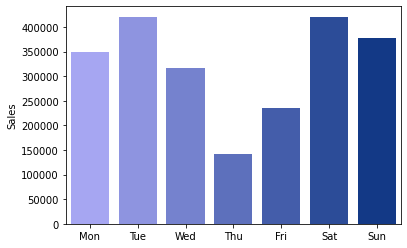

In [48]:
df["DoW"] = pd.to_datetime(df["Order Date"], format='%d/%m/%Y').dt.dayofweek

# bar colors
colors = ["#9999FF", "#8088EE", "#6677DD", "#4D66CC", "#3355BB", "#1A44AA", "#003399"]
sns.set_palette(sns.color_palette(colors))

sns.barplot(x=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], y=df.groupby(["DoW"]).sum('Sales')['Sales'])

# US Map

In [12]:
%%capture
!pip install --upgrade pyshp
!pip install cartopy==0.19.0.post1
!pip uninstall -y shapely # to prevent this error : https://stackoverflow.com/questions/60111684/geometry-must-be-a-point-or-linestring-error-using-cartopy
!pip install shapely --no-binary shapely

In [ ]:
#hide

"""
# download US States (shp files)
import requests
for file in ['st99_d00.shp', 'st99_d00.shx', 'st99_d00.dbf']:
  url = 'https://github.com/MichiganNLP/geoclustering/raw/master/' + file
  r = requests.get(url, allow_redirects=True)
  open(file, 'wb').write(r.content)
"""


"\n# download US States (shp files)\nimport requests\nfor file in ['st99_d00.shp', 'st99_d00.shx', 'st99_d00.dbf']:\n  url = 'https://github.com/MichiganNLP/geoclustering/raw/master/' + file\n  r = requests.get(url, allow_redirects=True)\n  open(file, 'wb').write(r.content)\n"

In [ ]:
#hide

#!pip install basemap
#from mpl_toolkits.basemap import Basemap as Basemap
# --> Deprecated in favor of Cartopy (since 2016)

"""
#plt.figure(figsize=(18,9))
m = Basemap(
    llcrnrlon=-121, llcrnrlat=20,
    urcrnrlon=-62,  urcrnrlat=51,
    projection='lcc',
    lat_1=32, lat_2=45, lon_0=-95
)
m.readshapefile('st99_d00', name='states', drawbounds=True)
m.drawcountries(color='#ffffff', linewidth=0.5)
m.fillcontinents(color='#c0c0c0', lake_color='#ffffff')

# draw points on the map
lats = [24.48237852, 26.89169118]
lons = [118.1558955, 117.1760012]
x, y = m(lons, lats)
plt.plot(x, y, 'bo', color='r', markersize=5)
"""


"\n#plt.figure(figsize=(18,9))\nm = Basemap(\n    llcrnrlon=-121, llcrnrlat=20,\n    urcrnrlon=-62,  urcrnrlat=51,\n    projection='lcc',\n    lat_1=32, lat_2=45, lon_0=-95\n)\nm.readshapefile('st99_d00', name='states', drawbounds=True)\nm.drawcountries(color='#ffffff', linewidth=0.5)\nm.fillcontinents(color='#c0c0c0', lake_color='#ffffff')\n\n# draw points on the map\nlats = [24.48237852, 26.89169118]\nlons = [118.1558955, 117.1760012]\nx, y = m(lons, lats)\nplt.plot(x, y, 'bo', color='r', markersize=5)\n"

A few states represents most of the sales (in $)

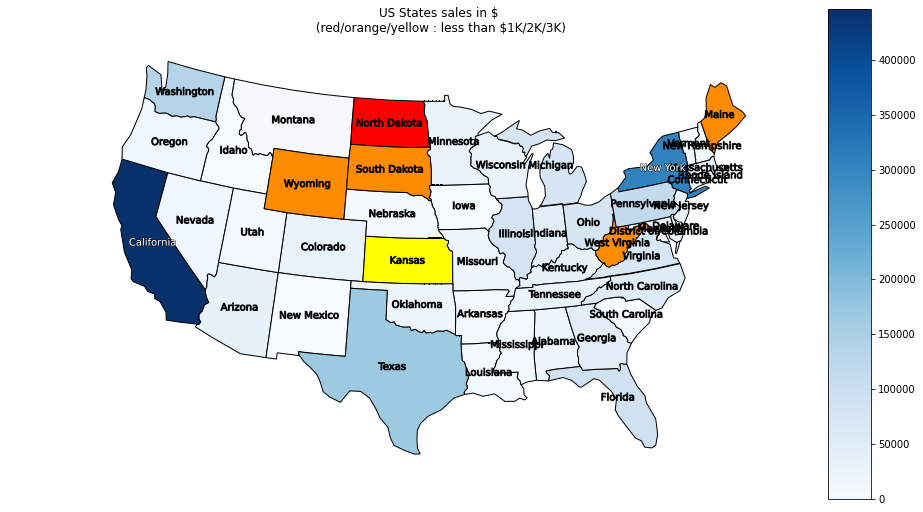

In [10]:
#collapse-hide

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib        as mpl
import matplotlib.patheffects as PathEffects

import shapely.geometry as sgeom
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader


# to hide Shapely 2.0 (future) warnings
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)


# Number of Sales per state
#df_2 = df.groupby(['State']).size()
# Number of Sales in $ per state
df_2 = df.groupby(['State']).sum('Sales')['Sales']

fig = plt.figure(figsize=(12,8))

min_worth = 1000

# to get the effect of having just the states without a map "background"
# turn off the background patch and axes frame
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(), frameon=False)
ax.patch.set_visible(False)
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
ax.set_title('US States sales in $\n (red/orange/yellow : less than $1K/2K/3K)')

# load US states boundaries
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m', category='cultural', name=shapename)

# colormap to get colors based on a value (from 0 to max)
cmap = mpl.cm.Blues(np.linspace(0, 1, int(df_2.max())+1))

# for all states in the shapefile
for state in shpreader.Reader(states_shp).records():

  state_name = state.attributes['name'].rstrip('\x00')
  x = state.geometry.centroid.x        
  y = state.geometry.centroid.y
  try:
    value = int(df_2[state_name])
  except KeyError:
    value = 0
  #print(state_name, value, cmap[value])

  if value < min_worth:
    color = 'red'
  elif value < 2*min_worth:
    color = 'darkorange'
  elif value < 3*min_worth:
    color = 'yellow'
  else:
    color = cmap[value]

  # add a colored state
  ax.add_geometries(
    [state.geometry],
    ccrs.PlateCarree(),
    facecolor=color,
    edgecolor='black',
    #styler=colorize_state #func
  )
  # add its name
  if(state_name not in ['Hawaii', 'Alaska']):
    ax.text(
        x, y, state_name, color='black' if value < 300000 else 'white', size=10,
        ha='center', va='center',
        transform=ccrs.PlateCarree(),
        path_effects=[PathEffects.withStroke(linewidth=1, foreground="k", alpha=.8)]
    )

ax2  = fig.add_axes([0.95,0.10,0.05,0.85])
norm = mpl.colors.Normalize(vmin=0,vmax=df_2.max()+1)
cb1  = mpl.colorbar.ColorbarBase(ax2,cmap=mpl.cm.Blues,norm=norm,orientation='vertical')

plt.show()

# Time serie

Visualization of the $ made per day over 4 years

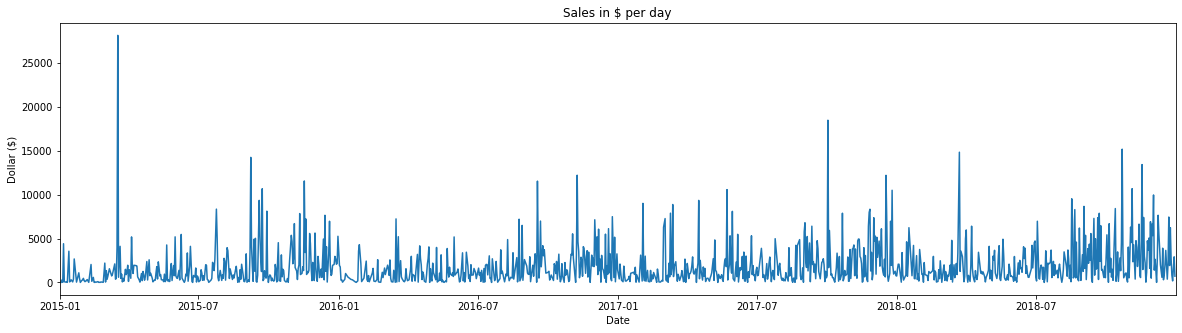

In [ ]:
#collapse-hide

import matplotlib.pyplot as plt

#print(df.columns) # Index(['Row ID', 'Order ID', 'Order Date', Ship Date', 'Ship Mode',
                  # 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
                  # 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
                  # 'Sub-Category', 'Product Name', 'Sales'],  dtype='object')

# Convert to panda date
df['Order Date 2'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
#print(df['Order Date 2'])
df.set_index(['Order Date 2'], inplace=True)

# reset_index : to keep columns (names)
ordered_sales = df.groupby(['Order Date 2'])['Sales'].sum().reset_index()

#print(ordered_sales.columns) # Index(['Sales'], dtype='object')
#print(ordered_sales) # 1230 lines (days on 4 years)

start_date = ordered_sales['Order Date 2'].min()
end_date = ordered_sales['Order Date 2'].max()

#print(start_date, end_date) # 2015-01-03 00:00:00 2018-12-30 00:00:00
#idx = pd.date_range(start=start_date, end=end_date, freq='D') # 1458 days : DatetimeIndex(['2015-01-03', ..., '2018-12-30'])

#ordered_sales['Order Date'].index = pd.DatetimeIndex(pd.to_datetime(ordered_sales['Order Date'], format='%d/%m/%Y').index)
#ordered_sales['Sales'] = ordered_sales['Sales'].reindex(idx, fill_value=0)

#print(ordered_sales.set_index('Order Date'))

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(ordered_sales['Order Date 2'], ordered_sales['Sales'])

ax.set_title('Sales in $ per day')
ax.set_xlabel('Date')
ax.set_ylabel('Dollar ($)')
ax.set_xlim(pd.Timestamp('2015-01-01'), pd.Timestamp('2018-12-31'))
plt.show()


# Various charts (again)

The duration between order and shipping (expedition?) doesn't seem to be correlated...

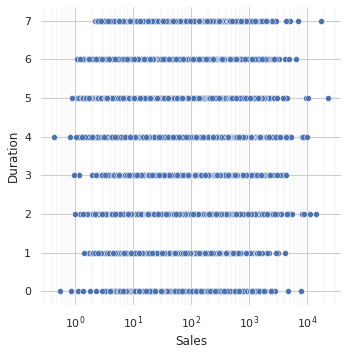

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

df["Duration"] = (pd.to_datetime(df["Ship Date"], format='%d/%m/%Y') - pd.to_datetime(df["Order Date"], format='%d/%m/%Y')).astype('timedelta64[h]').astype(np.int32) / 24

g = sns.relplot(
    data=df[['Sales', 'Duration']],
    x="Sales", y="Duration",
    #hue="year", size="mass",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True);


Various tests with `value_counts()` & `nunique()`

In [ ]:
test = df.loc[:, ['Category', 'Sub-Category']]==['Furniture', 'Bookcases']
print(test.head())
print("-"*30)
print(test.value_counts())
print("-"*30)
print(test.nunique())

              Category  Sub-Category
Order Date 2                        
2017-11-08        True          True
2017-11-08        True         False
2017-06-12       False         False
2016-10-11        True         False
2016-10-11       False         False
------------------------------
Category  Sub-Category
False     False           7722
True      False           1852
          True             226
dtype: int64
------------------------------
Category        2
Sub-Category    2
dtype: int64


In [ ]:
bookcases = df.query("Category == 'Furniture' & `Sub-Category` == 'Bookcases'") # filter on 2 columns (Logical AND)

print("Filtered dataset's size :", bookcases.shape) # (226 rows, 18 columns)

print("-"*10+" counts of distinct values "+"-"*10)
print(bookcases['Ship Mode'].value_counts())

print("-"*10+""+"-"*10)
print("Number of distinct values :", bookcases['Ship Mode'].nunique())

Filtered dataset's size : (226, 21)
---------- counts of distinct values ----------
Standard Class    123
Second Class       48
First Class        48
Same Day            7
Name: Ship Mode, dtype: int64
--------------------
Number of distinct values : 4


In [ ]:
test = bookcases.loc[:, ['Ship Mode', 'State']]==['Standard Class', 'California']
#print(test)
print(test[['Ship Mode', 'State']].value_counts())

Ship Mode  State
True       False    96
False      False    79
True       True     27
False      True     24
dtype: int64


In [ ]:
print("-"*30)
print(bookcases[['Ship Mode', 'State']].value_counts())
print("-"*30)
print(bookcases.nunique())

------------------------------
Ship Mode       State       
Standard Class  California      27
                New York        18
                Texas           16
First Class     California      11
Second Class    California      10
                                ..
                Missouri         1
Same Day        Connecticut      1
Second Class    Virginia         1
                Utah             1
First Class     South Dakota     1
Length: 67, dtype: int64
------------------------------
Row ID           226
Order ID         222
Order Date       199
Ship Date        209
Ship Mode          4
Customer ID      194
Customer Name    194
Segment            3
Country            1
City             108
State             33
Postal Code      136
Region             4
Product ID        49
Category           1
Sub-Category       1
Product Name      50
Sales            196
month             12
year               4
Duration           8
dtype: int64


In [ ]:
print(df.query("State == 'California' & Segment == 'Corporate'").shape) # (601 rows, 18 feature original columns)

(601, 21)


**CORRELATION**s

There is **no correlation** between Sales and shipping duration

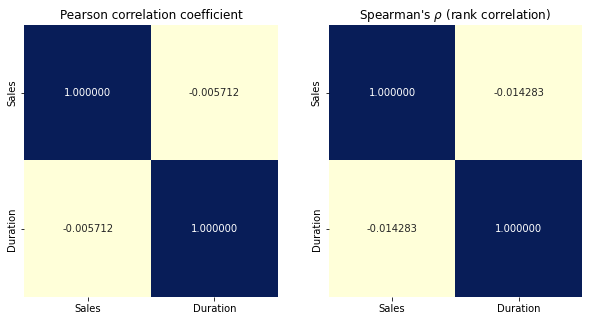

In [47]:
# Duration in days
df["Duration"] = (pd.to_datetime(df["Ship Date"], format='%d/%m/%Y') - pd.to_datetime(df["Order Date"], format='%d/%m/%Y')).astype('timedelta64[h]').astype(np.int32) / 24

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].set_title('Pearson correlation coefficient')
sns.heatmap(
  df[['Sales', 'Duration']].corr(), # method='pearson' (by default)
  cmap="YlGnBu", annot=True, fmt="f", cbar=False, ax=ax[0]
)
# => 0.005712

ax[1].set_title(r"Spearman's $\rho$ (rank correlation)")
sns.heatmap(
  df[['Sales', 'Duration']].corr(method='spearman'), # for non-linear correlation...
  cmap="YlGnBu", annot=True, fmt="f", cbar=False, ax=ax[1]
);
# abs = 0.014283 (not relevant, extremely small inverse correlation)

Plot univariate (or bivariate distributions) using kernel density estimation
https://seaborn.pydata.org/generated/seaborn.kdeplot.html

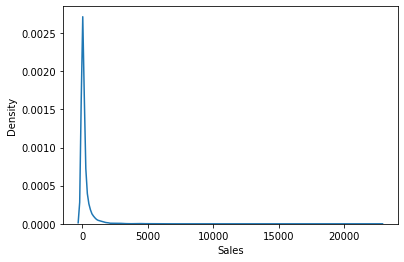

In [11]:
#print(df.columns)
df.reset_index(inplace=True)
sns.kdeplot(data=df, x='Sales');

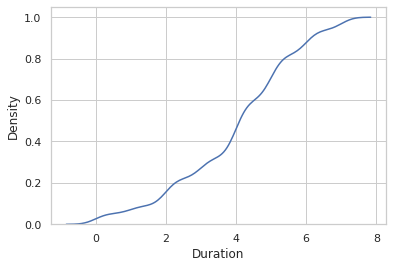

In [ ]:
sns.kdeplot(df['Duration'], cumulative=True);

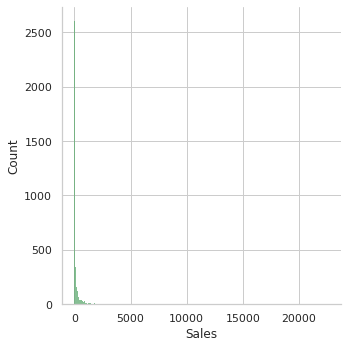

In [ ]:
# .distplot() => DEPRECATED ?
sns.displot(df['Sales'], color="g");

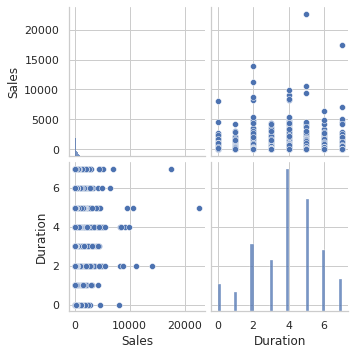

In [ ]:
# Plot "pairwise relationships"
sns.pairplot(df[['Sales', 'Duration']]);

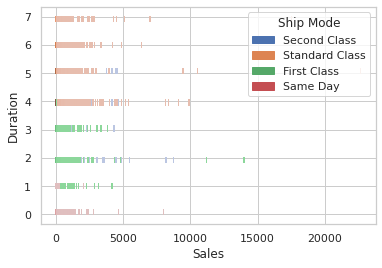

In [ ]:
# Bivariate histogram
sns.histplot(data=df, x='Sales', y='Duration', hue='Ship Mode');

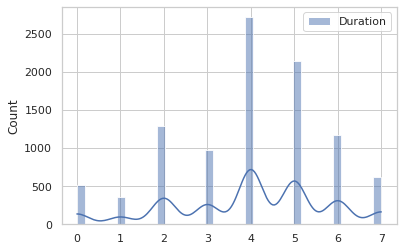

In [ ]:
sns.histplot(df[['Duration']], kde=True); # divided in 100 parts (=bins) 

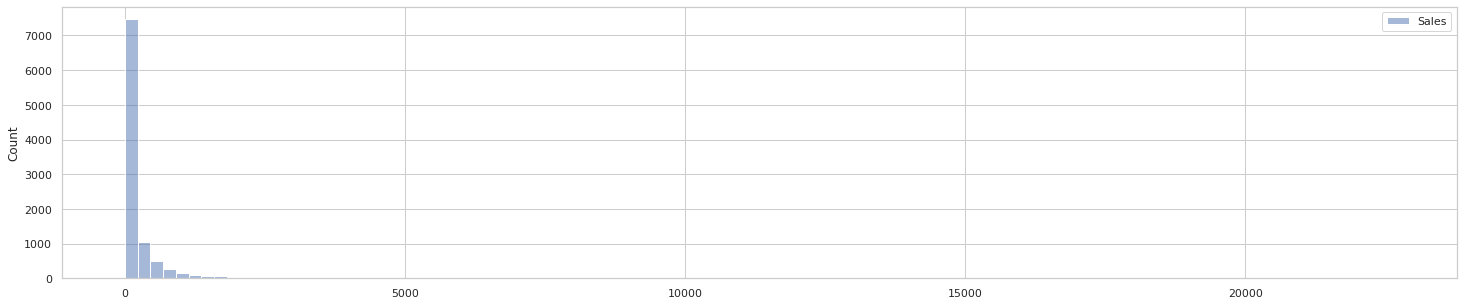

In [ ]:
plt.figure(figsize=(25,5))
sns.histplot(df[['Sales']], bins=100); # divided in 100 parts (=bins) 

isFast,False,True
State,,
California,1464,482
New York,869,228


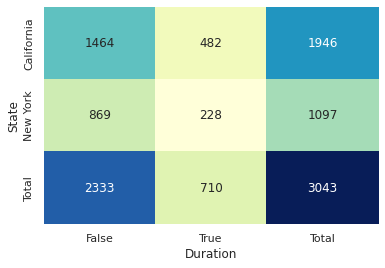

In [ ]:
c1 = df['State'].where((df['State'] == 'California') | (df['State'] == 'New York'))
c2 = df.Duration.isin([0, 1, 2]) # Fast ?
                      
# Summary table : 
sns.heatmap(pd.crosstab(
  c1,
  c2,
  #normalize=True, # rows sum to 1
  margins=True,
  margins_name='Total'
), cmap="YlGnBu", annot=True, fmt="d", cbar=False)


df_test = pd.concat([c1, c2], axis=1, keys=['State', 'isFast'])
# same results / other method
df_test.groupby(['State', 'isFast'])['State'].count().unstack().fillna(0)

In [ ]:
# Covariance : pairwise covariance of columns (excluding Null/NA values)
df[['Sales', 'Duration']].cov()

,Sales,Duration
Sales,392692.572239,-6.263013
Duration,-6.263013,3.061148


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f45e7d7c050> (for post_execute):


ValueError: ignored

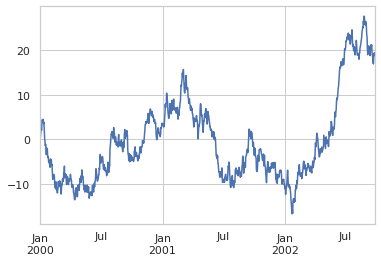

<Figure size 432x288 with 0 Axes>

ValueError: ignored

<Figure size 432x288 with 1 Axes>

In [ ]:
#hide

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();


df_four = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df_four = df_four.cumsum()

plt.figure()
df.plot()